In [1]:
# Import pustaka yang diperlukan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import SelectKBest, chi2

In [2]:
# 1. Data Processing
# Memuat data
file_path = 'dataKasus-1.xlsx'  # Ganti dengan path file Anda
data = pd.read_excel(file_path)

In [ ]:
# Memeriksa nama-nama kolom yang ada dalam dataset
print(data.columns)

# Menghapus kolom yang tidak diperlukan
data = data.drop(columns=['Unnamed: 12', 'NO', 'NAMA'])

# Menangani nilai yang hilang dan mengonversi kolom 'USIA' menjadi numerik
data['USIA'] = pd.to_numeric(data['USIA'].str.extract(r'(\d+)')[0], errors='coerce')
data['JARAK KELAHIRAN'].fillna(data['JARAK KELAHIRAN'].mode()[0], inplace=True)

# Mengisi nilai hilang pada kolom numerik lainnya dengan median
data.fillna(data.median(numeric_only=True), inplace=True)

# Encoding kategori ke bentuk numerik
label_encoders = {}
for column in data.select_dtypes(include='object').columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

In [4]:
# 2. Pemilahan Fitur (Memilih 15 Atribut)
# Memilih 15 fitur (kolom 'PE/Non PE' sebagai target)
selected_features = data.columns.tolist()[:15] + ['PE/Non PE']
X = data[selected_features].drop(columns='PE/Non PE')
y = data['PE/Non PE']

In [5]:
# 3. Modeling (3 Klasifikasi)
# Membagi data menjadi train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
# Model Klasifikasi
models = {
    'Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

In [7]:
# Fungsi untuk menampilkan confusion matrix sebagai heatmap
def plot_confusion_matrix(cm, model_name, title):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'{model_name} {title}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

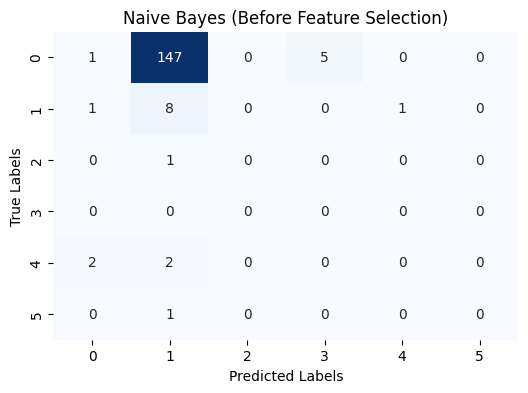

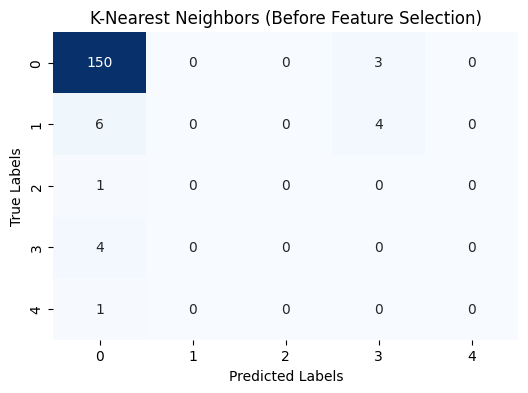

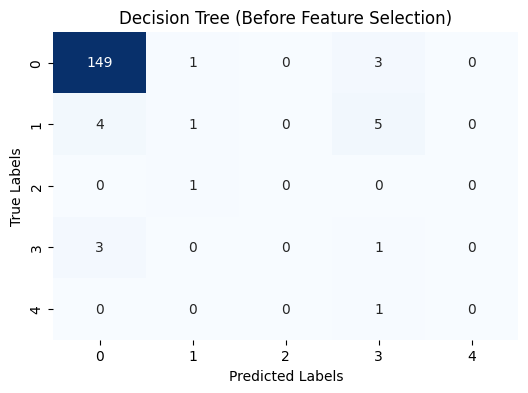

In [8]:
# Menghitung Confusion Matrix
confusion_matrices = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices[model_name] = cm
    # Plot confusion matrix
    plot_confusion_matrix(cm, model_name, "(Before Feature Selection)")

In [9]:
# 4. Seleksi Fitur (Mengurangi dari 15 ke 9)
selector = SelectKBest(chi2, k=9)
X_selected = selector.fit_transform(X, y)

In [10]:
# Membagi ulang data setelah seleksi fitur
X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(X_selected, y, test_size=0.3, random_state=42)

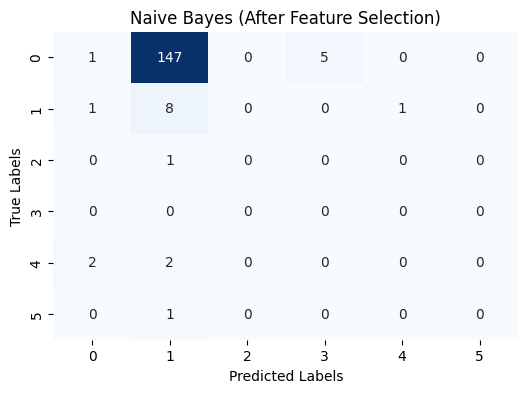

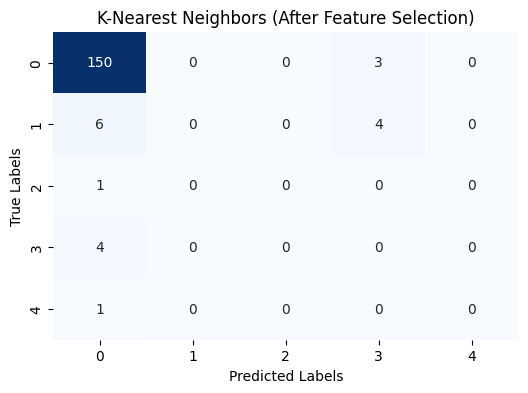

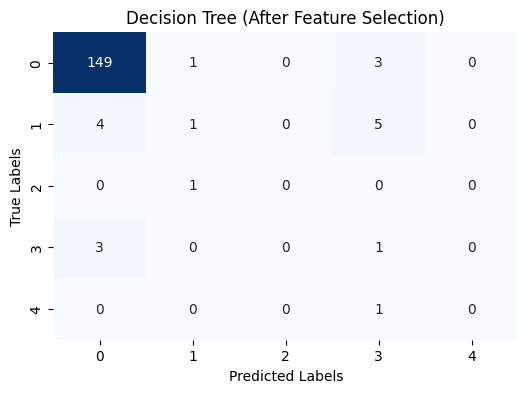

In [11]:
# Confusion Matrix setelah seleksi fitur
confusion_matrices_selected = {}
for model_name, model in models.items():
    model.fit(X_train_sel, y_train_sel)
    y_pred_sel = model.predict(X_test_sel)
    cm_sel = confusion_matrix(y_test_sel, y_pred_sel)
    confusion_matrices_selected[model_name] = cm_sel
    # Plot confusion matrix setelah seleksi fitur
    plot_confusion_matrix(cm_sel, model_name, "(After Feature Selection)")

In [12]:
# 5. Komparasi Hasil (Deskripsi Performa)
print("\nKomparasi Performa:")
for model_name in models.keys():
    print(f"\n{model_name} - Sebelum Seleksi Fitur:\n", confusion_matrices[model_name])
    print(f"{model_name} - Setelah Seleksi Fitur:\n", confusion_matrices_selected[model_name])


Komparasi Performa:

Naive Bayes - Sebelum Seleksi Fitur:
 [[  1 147   0   5   0   0]
 [  1   8   0   0   1   0]
 [  0   1   0   0   0   0]
 [  0   0   0   0   0   0]
 [  2   2   0   0   0   0]
 [  0   1   0   0   0   0]]
Naive Bayes - Setelah Seleksi Fitur:
 [[  1 147   0   5   0   0]
 [  1   8   0   0   1   0]
 [  0   1   0   0   0   0]
 [  0   0   0   0   0   0]
 [  2   2   0   0   0   0]
 [  0   1   0   0   0   0]]

K-Nearest Neighbors - Sebelum Seleksi Fitur:
 [[150   0   0   3   0]
 [  6   0   0   4   0]
 [  1   0   0   0   0]
 [  4   0   0   0   0]
 [  1   0   0   0   0]]
K-Nearest Neighbors - Setelah Seleksi Fitur:
 [[150   0   0   3   0]
 [  6   0   0   4   0]
 [  1   0   0   0   0]
 [  4   0   0   0   0]
 [  1   0   0   0   0]]

Decision Tree - Sebelum Seleksi Fitur:
 [[149   1   0   3   0]
 [  4   1   0   5   0]
 [  0   1   0   0   0]
 [  3   0   0   1   0]
 [  0   0   0   1   0]]
Decision Tree - Setelah Seleksi Fitur:
 [[149   1   0   3   0]
 [  4   1   0   5   0]
 [  0   